In [1]:
#1. 데이터 로드 및 기본 탐색

In [2]:
import pandas as pd

# 데이터 로드
trip_df = pd.read_csv('trip.csv')

# 데이터셋의 기본 정보 확인
print("Dataset Info:")
print(trip_df.info())

print("\nFirst few rows of the dataset:")
print(trip_df.head())

print("\nBasic Statistics:")
print(trip_df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB
None

First few rows of the dataset:
    passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0     Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1  Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM 

In [3]:
#2. 결측치 판단 및 처리

In [4]:
# 결측치가 있는 열과 결측치 개수 출력
missing_values = trip_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # 결측치가 있는 열만 필터링

print("missing valuess:")
print(missing_values)

missing valuess:
fare_amount    3
dtype: int64


In [5]:
# 결측치가 있는 행 삭제
trip_df.dropna(inplace=True)

In [6]:
#3. 이상치 판단 및 처리

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

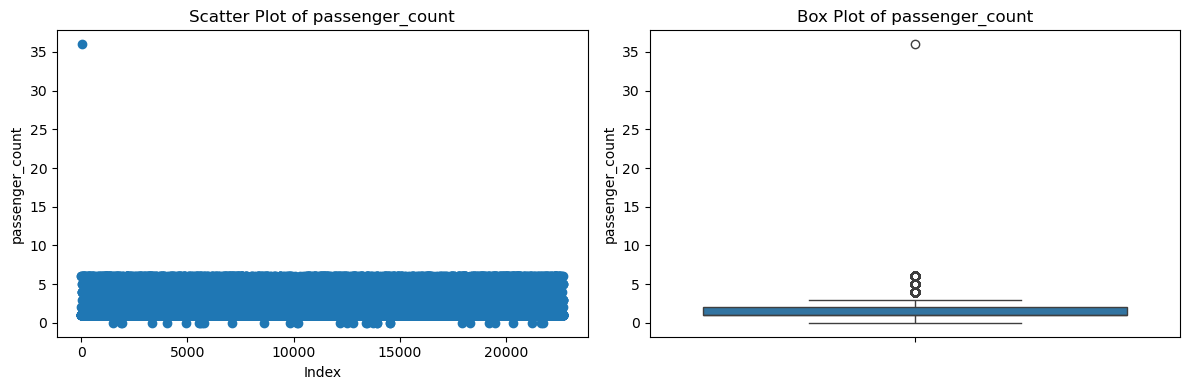

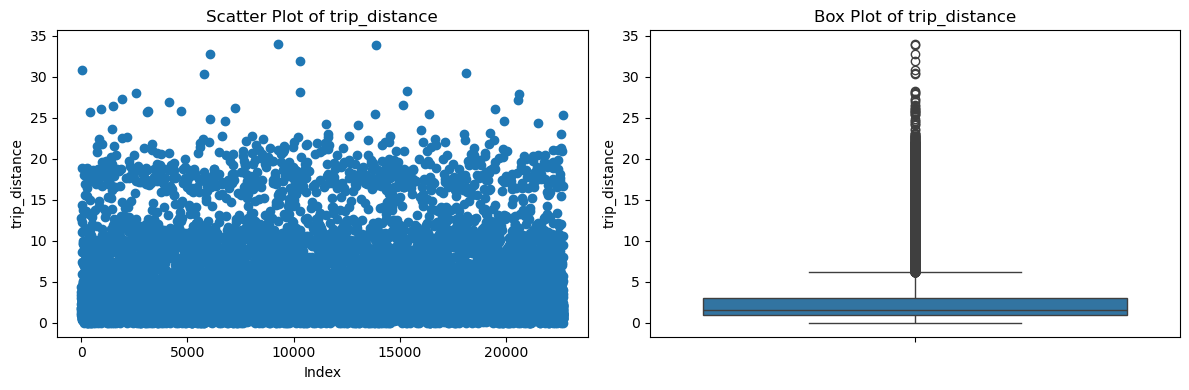

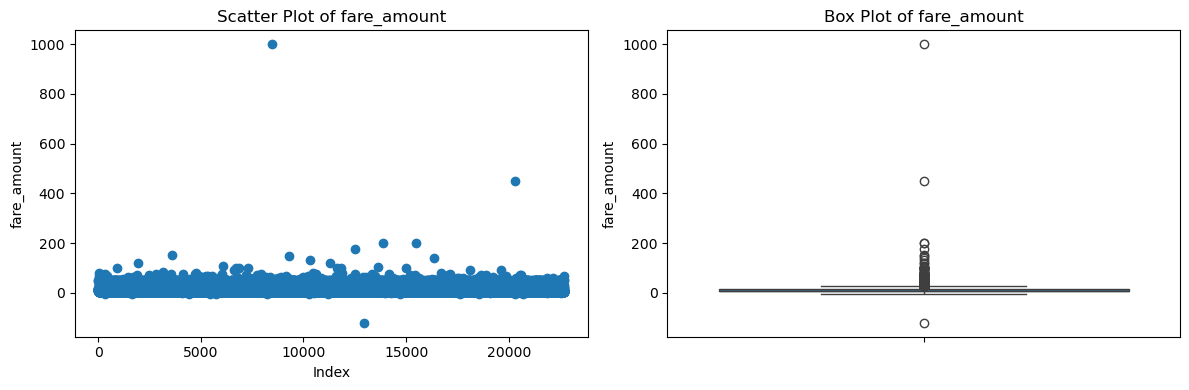

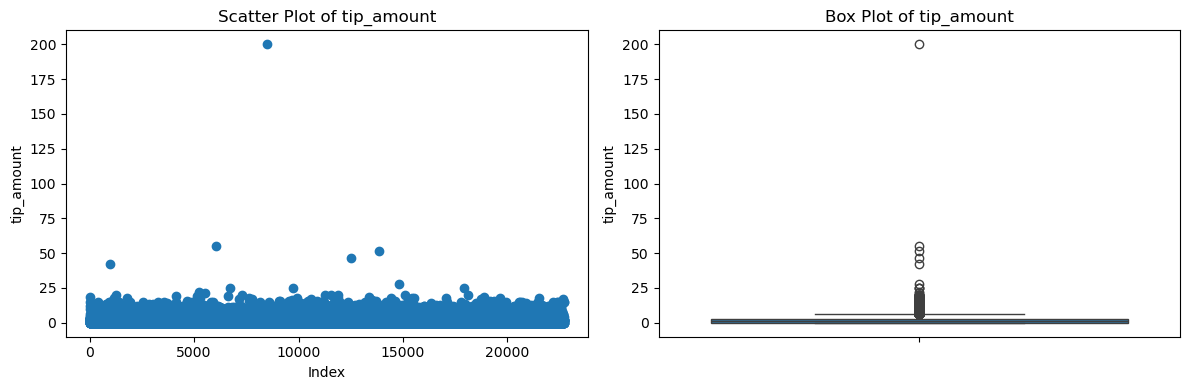

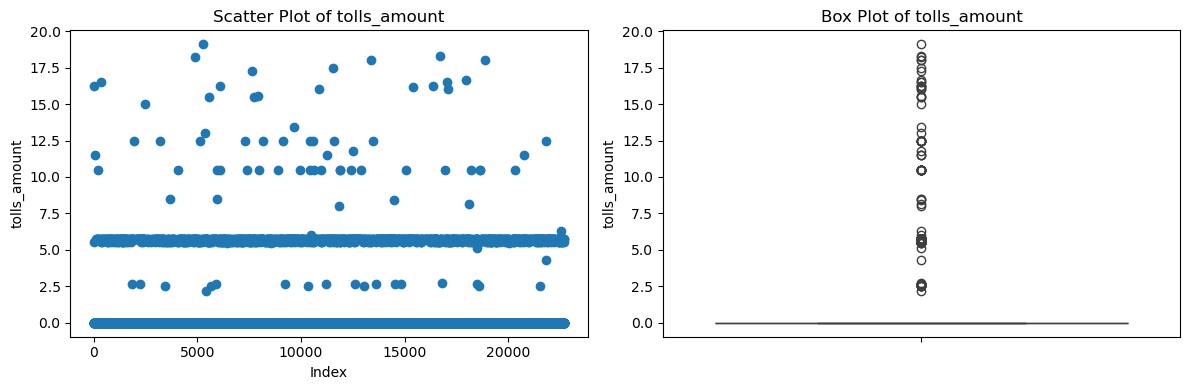

In [8]:
# 숫자형 변수 선택
numeric_columns = trip_df.select_dtypes(include=['float64', 'int64']).columns

# 이상치 탐색 및 시각화
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    
    # 산점도
    plt.subplot(1, 2, 1)
    plt.scatter(trip_df.index, trip_df[column])
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(data=trip_df, y=column)
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

In [9]:
# IQR을 이용한 이상치 기준 설정 및 이상치 탐지
outliers = pd.DataFrame()
for column in numeric_columns:
    Q1 = trip_df[column].quantile(0.25)
    Q3 = trip_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 판별 기준
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 데이터 필터링
    outliers[column] = trip_df[(trip_df[column] < lower_bound) | (trip_df[column] > upper_bound)][column]


In [10]:
#이상치 제거
for column in numeric_columns:
    Q1 = trip_df[column].quantile(0.25)
    Q3 = trip_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 판별 기준
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 남기기 (이상치를 제거)
    trip_df = trip_df[(trip_df[column] >= lower_bound) & (trip_df[column] <= upper_bound)]

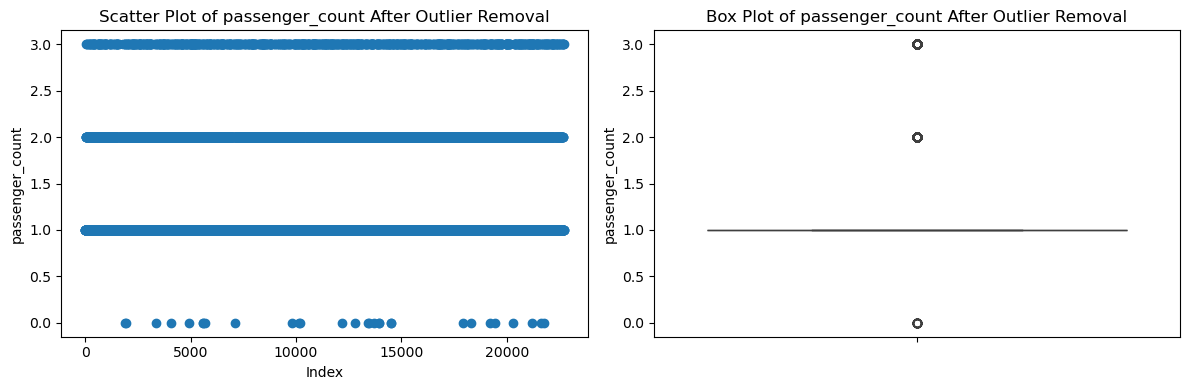

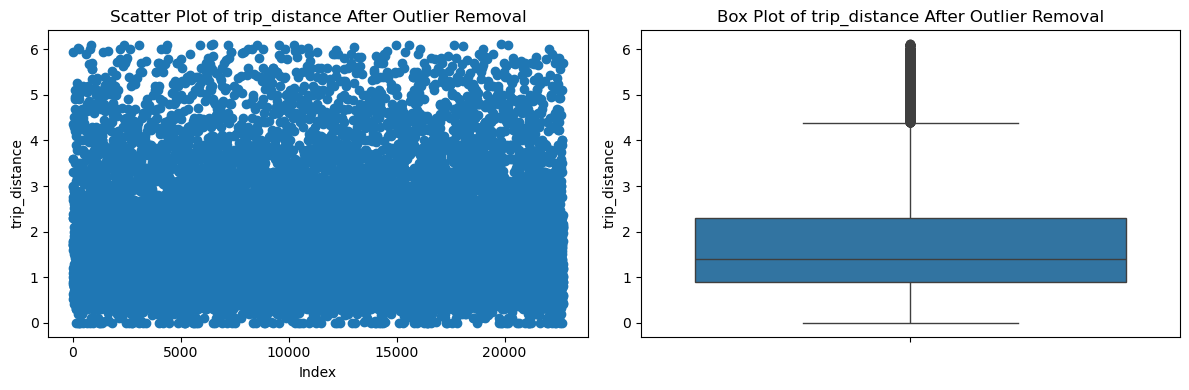

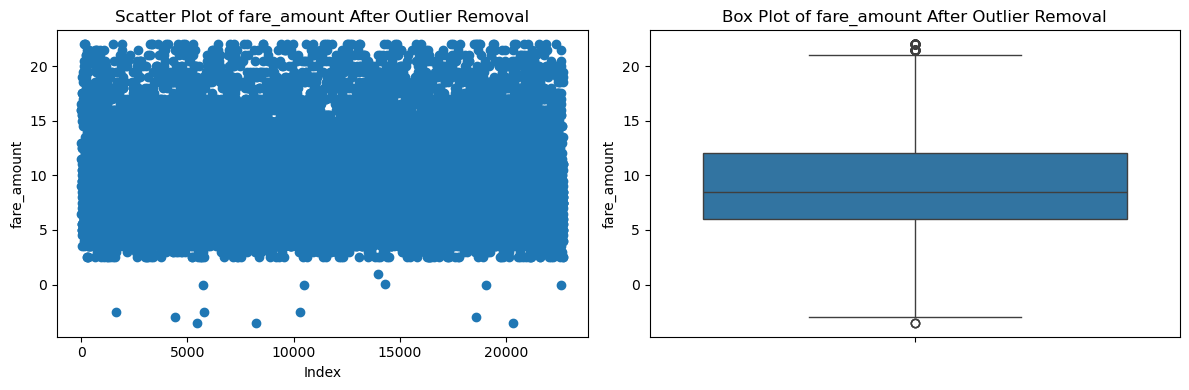

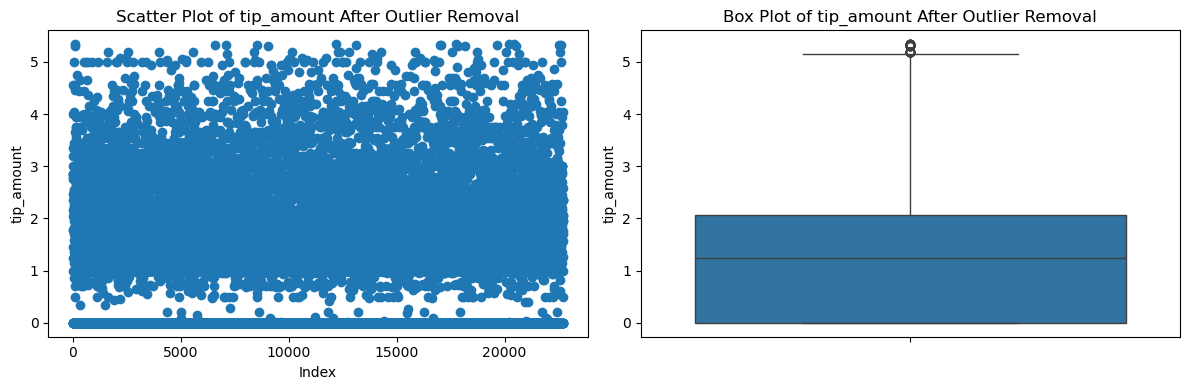

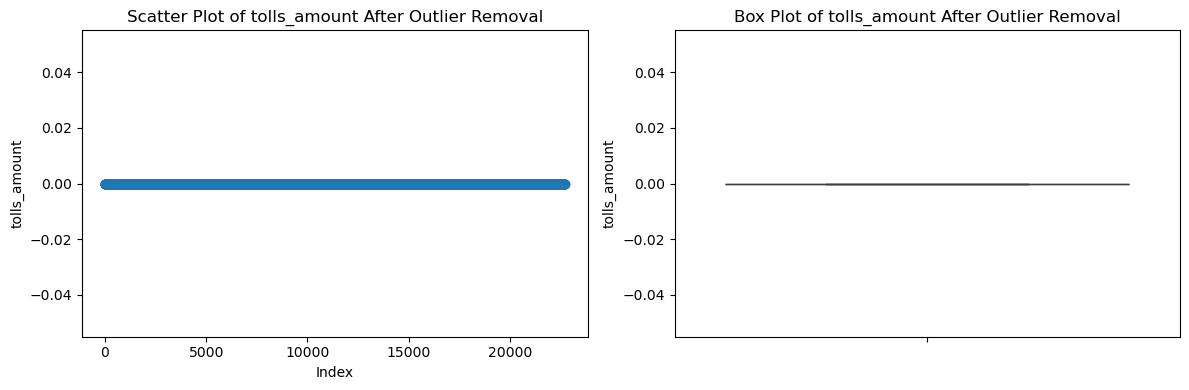

In [11]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    
    # 산점도
    plt.subplot(1, 2, 1)
    plt.scatter(trip_df.index, trip_df[column])
    plt.title(f'Scatter Plot of {column} After Outlier Removal')
    plt.xlabel('Index')
    plt.ylabel(column)

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(data=trip_df, y=column)
    plt.title(f'Box Plot of {column} After Outlier Removal')

    plt.tight_layout()
    plt.show()

In [12]:
for column in numeric_columns:
    Q1 = trip_df[column].quantile(0.25)
    Q3 = trip_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 현재 값이 범위 내에 있는지 확인
    print(f"{column} - Min: {trip_df[column].min()}, Max: {trip_df[column].max()}")
    print(f"{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

passenger_count - Min: 0, Max: 3
passenger_count - Lower Bound: 1.0, Upper Bound: 1.0

trip_distance - Min: 0.0, Max: 6.11
trip_distance - Lower Bound: -1.1999999999999997, Upper Bound: 4.3999999999999995

fare_amount - Min: -3.5, Max: 22.0
fare_amount - Lower Bound: -3.0, Upper Bound: 21.0

tip_amount - Min: 0.0, Max: 5.34
tip_amount - Lower Bound: -3.09, Upper Bound: 5.15

tolls_amount - Min: 0.0, Max: 0.0
tolls_amount - Lower Bound: 0.0, Upper Bound: 0.0



In [13]:
# passenger_count 변수의 고유값과 빈도 확인
print(trip_df['passenger_count'].value_counts())

passenger_count
1    13968
2     2793
3      814
0       29
Name: count, dtype: int64


In [14]:
# 탑승 인원이 0인 데이터를 제거
trip_df = trip_df[trip_df['passenger_count'] > 0]

In [15]:
outliers_count = trip_df[(trip_df['fare_amount'] < 0) | (trip_df['fare_amount'] > 100)].shape[0]
print(f"fare_amount 변수에서 도메인 기반 이상치 개수: {outliers_count}")

fare_amount 변수에서 도메인 기반 이상치 개수: 8


In [46]:
# fare_amount 값이 음수인 행 제거
trip_df = trip_df[trip_df['fare_amount'] >= 0]

In [16]:
#4. 탑승 및 하차 시간의 활용 가능성 검토

In [50]:
#주행 시간 계산
# 시간 변수를 datetime 형식으로 변환
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

# 주행 시간 계산 (분 단위)
trip_df['trip_duration'] = (trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']).dt.total_seconds() / 60

C:\Users\user\AppData\Local\Temp\ipykernel_12140\3034975641.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
C:\Users\user\AppData\Local\Temp\ipykernel_12140\3034975641.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])


In [52]:
#주행시간과 거리 관계
print(trip_df[['trip_duration', 'trip_distance']].corr())

               trip_duration  trip_distance
trip_duration       1.000000       0.098059
trip_distance       0.098059       1.000000


In [56]:
#주행 시간과 팁(tip_amount) 관계
print(trip_df[['trip_duration', 'tip_amount']].corr())

               trip_duration  tip_amount
trip_duration       1.000000    0.035798
tip_amount          0.035798    1.000000


In [ ]:
#5. 신용카드 및 직불카드 통합

In [58]:
trip_df['payment_method'] = trip_df['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [60]:
# 통합된 'payment_method' 열의 고유값과 빈도 확인
print(trip_df['payment_method'].value_counts())


payment_method
Card    8925
Cash    8642
Name: count, dtype: int64


In [18]:
#6. 주요 변수 간 상관관계 확인

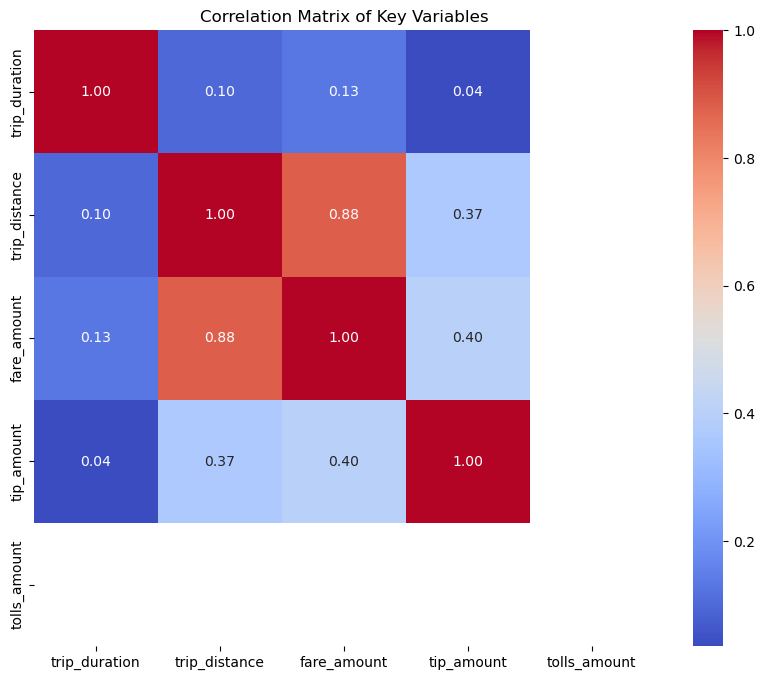

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주요 변수 간 상관 행렬 계산
correlation_matrix = trip_df[['trip_duration', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']].corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Variables")
plt.show()